In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True  # Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = r'\usepackage{sansmath}'
plt.rcParams['font.family'] = 'DejaVu Sans Mono'

In [13]:
mu, sigma = 0, 0.1 # mean and standard deviation

s = np.random.normal(mu, sigma, 10000)
print(abs(mu - np.mean(s)))
print(abs(sigma - np.std(s, ddof=1)))

0.0007583506987957877
0.00062193046237842


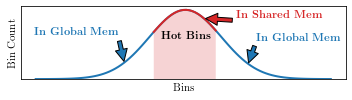

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(5,1.5))
nbins = 100
count, x = np.histogram(s, nbins, density=True)
# print(bins)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, linewidth=2, color='tab:blue')
plt.plot(x[nbins//2 - 10:nbins//2+12], y[nbins//2 - 10:nbins//2+12], linewidth=2, color='tab:red')
ax.fill_between(x[nbins//2 - 10:nbins//2+12], 0, y[nbins//2 - 10:nbins//2+12], alpha=0.2, facecolor='tab:red')
plt.ylim(0)
plt.xticks([])
plt.yticks([])
plt.xlabel('Bins', fontsize=11)
plt.ylabel('Bin Count', fontsize=11)
plt.annotate(r'\bfseries In Shared Mem', xy=(x[nbins//2+7], y[nbins//2+7]),
            xycoords='data', xytext=(0.14, 3.5),
            arrowprops={'facecolor':'tab:red', 'shrink':0.05},
            color='tab:red', fontsize=11)
plt.annotate(r'\bfseries In Global Mem', xy=(x[nbins//2-20], y[nbins//2-20]),
            xycoords='data', xytext=(-0.42, 2.5),
            arrowprops={'facecolor':'tab:blue', 'shrink':0.05},
            color='tab:blue',fontsize=11,
            ha='left')
plt.annotate(r'\bfseries In Global Mem', xy=(x[nbins//2+22], y[nbins//2+22]),
            xycoords='data', xytext=(0.43, 2.2),
            arrowprops={'facecolor':'tab:blue', 'shrink':0.05},
            color='tab:blue', ha='right', fontsize=11)
plt.annotate(r'\bfseries Hot Bins', xy=(0, 2.5),
            xycoords='data', ha='center', va='center',
            color='black', fontsize=11)
plt.tight_layout()
plt.savefig('cuda-shmem-hot-bins.pdf', dpi=600, bbox_inches='tight')